<a href="https://colab.research.google.com/github/dvishal47/Scaler-Clustering/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scaler Clustering**
**-by Vishal Dubey**

## **Problem Statement :**
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

## **Data Dictionary:**

* ‘Unnamed 0’ - Index of the dataset
* Email_hash - Anonymised Personal Identifiable Information (PII)
* Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
* orgyear - Employment start date
* CTC - Current CTC
* Job_position - Job profile in the company
* CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)

### **Importing important Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### **Download dataset**

In [2]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 36.5MB/s]


In [3]:
df=pd.read_csv("/content/scaler_clustering.csv")

In [4]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


**Drop unwanted column**

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### **Structure of dataset :**

In [6]:
df.shape

(205843, 6)

### **Characteristics of the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


### **Drop duplicated rows if any**

In [8]:
df.duplicated().sum()

34

In [9]:
df.drop_duplicates(inplace=True)

### **Data Pre-processing**

In [10]:
df['email_hash'].nunique()

153443

In [11]:
df['email_hash'].value_counts()

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
...,...
63933d31becd1487d93d56844919896334e3ae39c4095979816c6fbb8816153a,1
23bcc14067e0fec60b8772b3e20abbb8fa9f2146738d37056e0d20d33a97c690,1
5a1c9d9a745d6ee95136047698dba8f68f00bac522de6d83d18cf062f7286e22,1


In [12]:
df.loc[df['email_hash']=="bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b"]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


Apparently for single Anonymised Personal Identifiable Information (PII) id there exists multiple rows with same joining dates and company but different job positions, this couldn't be possible.
We will take the first row in case of duplicated PII ids.

In [13]:
df=df.groupby('email_hash').first().reset_index()

### **Missing Values**

In [14]:
df.isnull().sum()

,0
email_hash,0
company_hash,32
orgyear,78
ctc,0
job_position,20225
ctc_updated_year,0


**There are null values in column company_hash , orgyear, job_position**

In [15]:
df['job_position']=df['job_position'].fillna('Not Available')

In [16]:
df['company_hash'] = df['company_hash'].fillna('Not Available').apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', str(x).title()))

In [17]:
df['orgyear'].mean()

2014.5356958888924

In [18]:
df['orgyear'] = df['orgyear'].fillna(2014.0)

In [19]:
df.isnull().sum()

,0
email_hash,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


In [20]:
df.shape

(153443, 6)

## **Feature Engineering**

In [21]:
df['YoE'] = df['ctc_updated_year'] - df['orgyear']

## **Feature Mean Encoding**

In [22]:
feat = 'company_hash'
df[feat] = df[feat].fillna('na')
enc_nom = (df.groupby(feat).size()) / len(df)
df[feat+'_encode'] = df[feat].apply(lambda x : enc_nom[x])

In [23]:
feat = 'job_position'
df[feat] = df[feat].fillna('na')
enc_nom = (df.groupby(feat).size()) / len(df)*10000
df[feat+'_encode'] = df[feat].apply(lambda x : enc_nom[x])

Feature encoding of column company_hash and job_position is important because they
can be used for in upcoming clustering methods in the projects

In [24]:
df.describe()

,orgyear,ctc,ctc_updated_year,YoE,company_hash_encode,job_position_encode
count,153443.000000,1.534430e+05,153443.000000,153443.000000,153443.000000,153443.000000
mean,2014.535424,2.517375e+06,2019.470592,4.935168,0.003809,1164.994337
std,73.054083,1.311281e+07,1.367097,73.050515,0.007610,834.305931
min,0.000000,2.000000e+00,2015.000000,-18146.000000,0.000007,0.065171
25%,2013.000000,5.500000e+05,2019.000000,2.000000,0.000020,401.973371
50%,2016.000000,9.699990e+05,2020.000000,4.000000,0.000365,1318.079026
75%,2018.000000,1.700000e+06,2021.000000,6.000000,0.003070,1319.056588
max,20165.000000,1.000150e+09,2021.000000,2021.000000,0.034221,2431.717315


**Removing Years of Experience which is negative**

In [25]:
df=df.loc[df['YoE']>=0]

In [26]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,7.0,0.010160,2431.717315
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000,Backend Engineer,2020.0,7.0,0.000007,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000,Not Available,2018.0,9.0,0.003760,1318.079026
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000,Database Administrator,2020.0,2.0,0.034221,33.497781


### **Outliers Treatment**

In [27]:
df['ctc'].describe()

,ctc
count,1.462580e+05
mean,2.457266e+06
std,1.278320e+07
min,2.000000e+00
25%,5.500000e+05
50%,9.699990e+05
75%,1.700000e+06
max,1.000150e+09


<Axes: ylabel='ctc'>

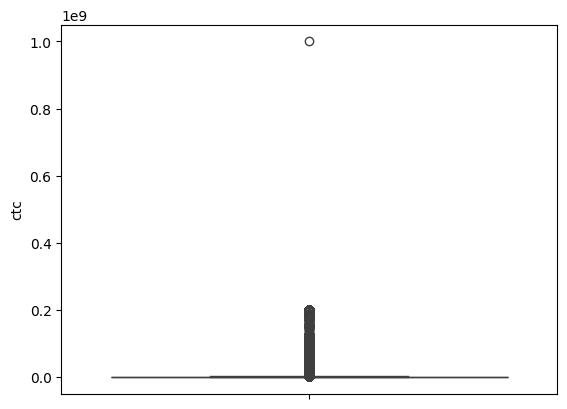

In [28]:
sns.boxplot(df['ctc'])

**There are huge outliers in CTC column.**

In [29]:
Q1 = df['ctc'].quantile(0.25)
Q3 = df['ctc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
df['ctc'] = np.where(df['ctc'] > upper_bound, upper_bound, df['ctc'])

In [31]:
df['ctc'] = np.where(df['ctc'] < lower_bound, lower_bound, df['ctc'])

**Removing orgyear which is 2 or 3 digits**

In [32]:
df.loc[df['orgyear']<1900]['orgyear'].value_counts().sum()

40

In [33]:
df=df.loc[(df['orgyear']>=1900)]

In [34]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3425000.0,Backend Engineer,2019.0,7.0,0.010160,2431.717315
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7.0,0.000007,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,9.0,0.003760,1318.079026
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2.0,0.034221,33.497781


## **Univariate Analysis**

In [35]:
tmp = df.copy()
tmp['count'] = 1
tmp = tmp.groupby('job_position').sum()['count'].reset_index().sort_values('count',ascending=False).head(15)

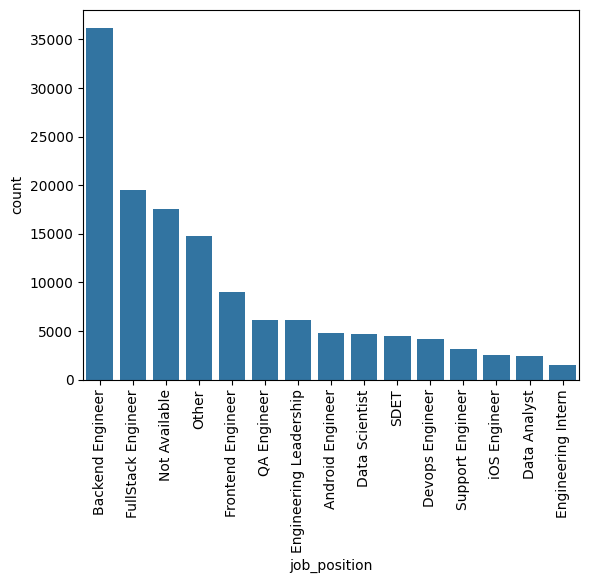

In [36]:
sns.barplot(data=tmp,y='count',x='job_position')
plt.xticks(rotation=90)
plt.show()

### **Insights :**


*   "Backend Engineer" has highest number of Job and is followed by "FullStack Engineer" and "Frontend Engineer"



In [37]:
tmp = df.copy()
tmp['count'] = 1
tmp = tmp.groupby('orgyear').sum()['count'].reset_index().sort_values('count',ascending=False).head(15)
tmp1 = df.copy()
tmp1['count'] = 1
tmp1 = tmp1.groupby('ctc_updated_year').sum()['count'].reset_index().sort_values('count',ascending=False).head(15)

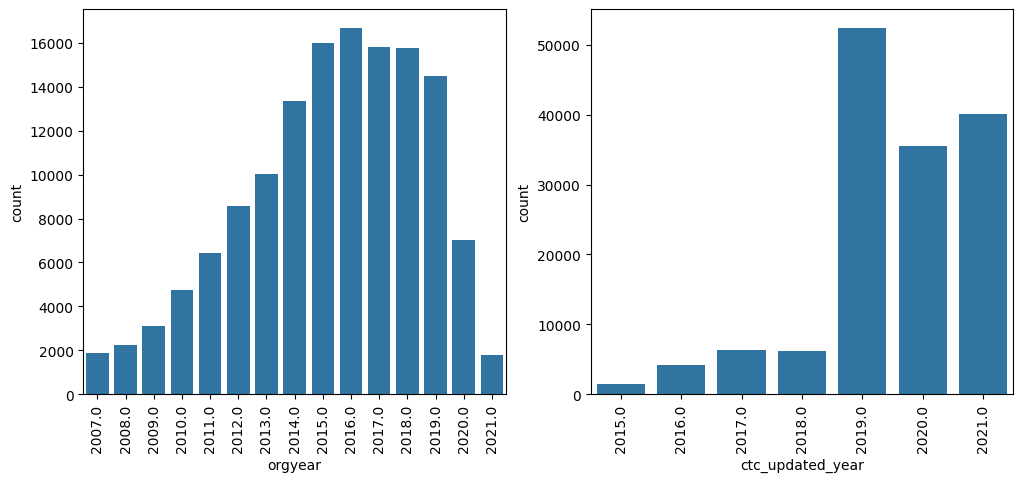

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=tmp,y='count',x='orgyear')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(data=tmp1,y='count',x='ctc_updated_year')
plt.xticks(rotation=90)
plt.show()

### **INSIGHTS :**
1. There is increase in employment from 2010 and was at peak between 2015 to 2019. After 2019, there was decrease in employment in 2020 and 2021, This decline can be due to Covid-19 Pandemics.
2. Similarly, CTC updation (Yearly increments, Promotions) was  higher in 2019 and decreased after that.


## **Multivariate Analysis**

In [39]:
df.groupby("job_position")['ctc'].mean().reset_index().sort_values('ctc',ascending=False).head(10)

,job_position,ctc
650,Sr HR Executive,3425000.0
372,PhD. Student,3425000.0
513,Senior Manager,3425000.0
514,Senior Manager IT,3425000.0
520,Senior QA Engineer III,3425000.0
522,Senior SDET,3425000.0
654,Sr Solution Architect,3425000.0
535,Senior System Engineer,3425000.0
46,Applications Engineer 2,3425000.0
47,Applied Scientist,3425000.0


In [40]:
df.groupby(["orgyear"])['ctc'].mean().reset_index().sort_values('ctc',ascending=False).head(10)

,orgyear,ctc
2,1971.0,3.425000e+06
0,1900.0,3.170000e+06
7,1979.0,3.100000e+06
10,1984.0,2.975000e+06
11,1985.0,2.886250e+06
12,1986.0,2.513125e+06
25,1999.0,2.458548e+06
20,1994.0,2.429086e+06
24,1998.0,2.394769e+06
26,2000.0,2.330758e+06


## **INSIGHTS :**
1. Mean salary of employees have reduced over the years despite rising inflation rate which is not good

In [41]:
df.groupby(["orgyear",'job_position'])['ctc'].mean().reset_index().sort_values('ctc',ascending=True).head(10)

,orgyear,job_position,ctc
5,1973.0,Co-founder,1000.0
1103,2015.0,New graduate,2000.0
730,2011.0,Technical consultant,2000.0
1301,2016.0,Software Enginner,6200.0
772,2012.0,Matlab programmer,10000.0
1165,2015.0,Some data entry operator like some copy's writ...,10000.0
1833,2021.0,Any technical,10000.0
1235,2016.0,Junior consultant,10000.0
1266,2016.0,"SDE, Lead",16200.0
1262,2016.0,Research Engineer,20000.0


**INSIGHTS :**
1. New Job seekers should focus on this as this have high average CTC.


# **MANUAL CLUSTERING**

### **Analysis at Company , Job Position and  Year Of Experience Level**

In [42]:
grp = ['company_hash','job_position','YoE']
data_tmp1 = df.groupby(grp).agg({'ctc':['mean','median','min','max','count']}).reset_index()

In [43]:
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]

In [44]:
datatmp = df.merge(data_tmp1[['company_hash', 'job_position', 'YoE', 'mean ctc']],on=['company_hash', 'job_position', 'YoE'],how='left')

In [45]:
conditions = [datatmp['ctc'] > datatmp['mean ctc'], datatmp['ctc']==datatmp['mean ctc'] ,datatmp['ctc'] < datatmp['mean ctc']]
choices = [1,2,3]

datatmp['ctc_cat'] = np.select(conditions, choices)

In [46]:
datatmp.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode,mean ctc,ctc_cat
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3425000.0,Backend Engineer,2019.0,7.0,0.010160,2431.717315,2.552657e+06,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7.0,0.000007,2431.717315,2.500000e+05,2
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,17.0,0.000072,1319.056588,2.000000e+06,2
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,9.0,0.003760,1318.079026,2.549500e+06,1
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2.0,0.034221,33.497781,4.685711e+05,3


### **Analysis at Company & Job Position LeveL**

In [47]:
grp = ['company_hash','job_position']
data_tmp1 = df.groupby(grp).agg({'ctc':[('mean2','mean'),'median','min','max','count']}).reset_index()

In [48]:
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]

In [49]:
datatmp = datatmp.merge(data_tmp1[['company_hash','job_position','mean2 ctc']],on=['company_hash', 'job_position'],how='left')

In [50]:
conditions = [datatmp['ctc'] > datatmp['mean2 ctc'], datatmp['ctc']==datatmp['mean2 ctc'] ,datatmp['ctc'] < datatmp['mean2 ctc']]
choices = [1,2,3]

datatmp['Class'] = np.select(conditions, choices)

### **Analysis at Company Level**

In [51]:
data_tmp1 = df.groupby('company_hash').agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()

In [52]:
data_tmp1.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_tmp1.columns.droplevel(1), data_tmp1.columns.droplevel(0))  ]

In [53]:
datatmp = datatmp.merge(data_tmp1[['company_hash','mean3 ctc']],on=['company_hash'],how='left')

In [54]:
conditions = [datatmp['ctc'] > datatmp['mean3 ctc'], datatmp['ctc']==datatmp['mean3 ctc'] ,datatmp['ctc'] < datatmp['mean3 ctc']]
choices = [1,2,3]

datatmp['Tier'] = np.select(conditions, choices)

In [55]:
datatmp.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode,mean ctc,ctc_cat,mean2 ctc,Class,mean3 ctc,Tier
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3425000.0,Backend Engineer,2019.0,7.0,0.010160,2431.717315,2.552657e+06,1,2.434360e+06,1,2.374148e+06,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7.0,0.000007,2431.717315,2.500000e+05,2,2.500000e+05,2,2.500000e+05,2
2,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,17.0,0.000072,1319.056588,2.000000e+06,2,1.067500e+06,1,1.797000e+06,1
3,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,9.0,0.003760,1318.079026,2.549500e+06,1,2.312559e+06,1,2.370569e+06,1
4,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2.0,0.034221,33.497781,4.685711e+05,3,4.864999e+05,3,6.241602e+05,3


In [56]:
datatmp['diff_desig'] = datatmp['ctc'] - datatmp['mean ctc']
datatmp['diff_class'] = datatmp['ctc'] - datatmp['mean2 ctc']
datatmp['diff_tier'] = datatmp['ctc'] - datatmp['mean3 ctc']

### **Answering question based on manual clustering**

**Question : Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [57]:
datatmp.loc[datatmp['Class']==1].sort_values(by='diff_tier',ascending=False).head(10)[['email_hash','company_hash','orgyear','ctc','job_position','mean3 ctc','diff_tier']]

,email_hash,company_hash,orgyear,ctc,job_position,mean3 ctc,diff_tier
71008,7cb2ba24aff8e62ada53a43f62c15fa93dc8ea6957b699...,Hztburgjta,2017.0,3425000.0,Backend Engineer,581483.854839,2.843516e+06
46827,5252a3a0301c51073ffec6308518d0314a3cc0aa4bcb06...,Hztburgjta,2017.0,3425000.0,Other,581483.854839,2.843516e+06
134533,eb8bcdf81071ebf9543cd3f3ffd798fd8754c7ecbb374d...,Fxuqg Rna Xzaxv,2017.0,3425000.0,Support Engineer,594954.545455,2.830045e+06
75093,83b63b7b67a1845d1c29296d19ff6c47b7b96442f3c99f...,Rtdxoztdxo,2019.0,3425000.0,Data Scientist,596700.000000,2.828300e+06
87150,98a1e7b8cd571b39fecc450b0a95003a670b1801218bb2...,Ygbt Atugn,2020.0,3425000.0,Not Available,606863.636364,2.818136e+06
89228,9c41b317b29a0d5c6bd464a8f8ab0f9a6be7fa55a81775...,Nvnv Wgzohrnvzwj Otqcxwto,2020.0,3425000.0,Frontend Engineer,624160.193134,2.800840e+06
74119,8212e1a25405440bf29178cd87f89bb1ad33108e3cbc04...,Nvnv Wgzohrnvzwj Otqcxwto,2020.0,3425000.0,Data Analyst,624160.193134,2.800840e+06
128671,e15abfd41c005995728191e49ef001e83e813cd3ed5104...,Nvnv Wgzohrnvzwj Otqcxwto,2015.0,3425000.0,Support Engineer,624160.193134,2.800840e+06
139406,f3e9768710cadc5aaadfa86cb5fb6bb1b8d7f71717a7a9...,Nvnv Wgzohrnvzwj Otqcxwto,2016.0,3425000.0,Other,624160.193134,2.800840e+06
116508,cc08a21b52d3f96c3bf78b9d6b6efec1009aaca6bf9c62...,Nvnv Wgzohrnvzwj Otqcxwto,2019.0,3425000.0,FullStack Engineer,624160.193134,2.800840e+06


## **INSIGHTS :**
Among top 10 employees (earning more than most of the employees in the company) in Tier 1, they belong to 5 companies indicating that this companies pay high to their employees.
Also their mean CTC is highest around (34.5L)



**Question : Top 10 employees of data science in each company earning more than their peers - Class 1**

In [58]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 1)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=False).head(10)[['email_hash','company_hash','job_position','ctc','mean2 ctc']]

,email_hash,company_hash,job_position,ctc,mean2 ctc
60800,6aa8cfeb5b98da66158e0af4ca8869362174abdba84a02...,Nvnv Wgzohrnvzwj Otqcxwto,Data Scientist,3200000.0,7.489202e+05
93534,a3c3f4ba000ad749715d0f3ec656516f4ed39c75553bb3...,Zgzt,Data Scientist,3425000.0,1.058462e+06
35034,3d40b5d9d86df2b93118cddc6a1ad26026eaa14c63ad81...,Vwwtznhqt,Data Scientist,3425000.0,1.066750e+06
114518,c8aa6d972a077a45edbca5a1347878dbfdb3307b366b9b...,Zgn Vuurxwvmrt Vwwghzn,Data Scientist,3425000.0,1.136923e+06
18386,1ff756b1855c0faa035c7873dee21d01a6d4b2cb18f0eb...,Zgn Vuurxwvmrt Vwwghzn,Data Scientist,3425000.0,1.136923e+06
73501,80f1ae60373f0ada3b75ce19eb585f8cf112de3cfa6ea7...,Zvz,Data Scientist,3425000.0,1.153080e+06
141129,f6e8c41a40ec308c996d498e22729359d2b564cae037a0...,Bh Oxsbv Mhoxztoo Ogrhnxgzo,Data Scientist,3425000.0,1.204375e+06
146166,ffe6e45b1b87424286ea0e9e2f12891809a333b407f386...,Wvustbxzx,Data Scientist,3000000.0,8.387500e+05
43742,4cfa7e643b30a89189bcca6084c9e273a9783e83ad3b81...,Nvnv Wgzohrnvzwj Otqcxwto,Data Scientist,2900000.0,7.489202e+05
12642,15adaeb2eef9c0ee8a0f18e189bf426be390f5d1e911fd...,Zvsvqqg,Data Scientist,3425000.0,1.285000e+06


### **INSIGHTS :**
1. Among top 10 employees of data science in each company earning more than their peers - Class 1, employees at position "Data Scientist" are at top and average ctc is 33L.

**Bottom 10 employees of data science in each company earning less than their peers - Class 3**

In [59]:
datatmp[(datatmp['Tier'] == 1)&(datatmp['Class'] == 3)&(datatmp['job_position'].isin(['Data Science Analyst','Data Scientist','Data Scientist II','Associate Data Scientist','Senior Data Scientist']))].sort_values('diff_class',ascending=True).head(10)[['email_hash','company_hash','job_position','ctc','mean2 ctc']]

,email_hash,company_hash,job_position,ctc,mean2 ctc
24214,2a3136f6e2d03a3dbfa3f683e4ae1b744b4815a8e0177c...,Mrvwpqgwp,Data Scientist,1700000.0,2981250.0
128507,e10edc50e41a606bb3412ba3085c4273da8c00688d60e8...,Vngo Ojzntr,Data Scientist,1050000.0,2237500.0
95602,a7765e6e00b19509be7604855e33dfcfde4c5f49931f5c...,Rvb Qtotvqwy,Data Scientist,1390000.0,2407500.0
57458,64a2f5293ac0800fcf43673d65d85d2b5817a11a062a12...,Kguutqwgb,Data Scientist,1450000.0,2437500.0
92683,a24b8507c09aa5d0e0b1d2e72cb1292eb07749f09b528f...,Eqtoyfgqpo,Data Scientist,1500000.0,2426000.0
139818,f49bd18e7fe914929f6cc23bb4e7979d58290119f2adcf...,Ntqvavnv,Data Scientist,1600000.0,2500000.0
145363,fe693198a836a33bb36ae893e6988acac0c4fc12f2e669...,Jghurho Xzw,Data Scientist,1650000.0,2537500.0
62850,6e4b185d9b1fa901e6c408dd226e24dd3eb4d24695084b...,Zxxn Ntwyzgrgsxto,Data Scientist,1500000.0,2375000.0
37969,4284c6d3434d477fbf778adfabd14a3cf7f558e14ae7af...,Avnvftvct Ucn Rna,Data Scientist,1450000.0,2225000.0
82407,9069f6772b1e7959734a115bf49b2168a888608496af50...,Ko Voogwxvnto,Data Scientist,1900000.0,2662500.0


### **INSIGHTS :**
1. Among bottom 10 employees from class 3 in data science in each company earning less than their peers are also from "Data Scientist" positions but different company as from Class 1 with average ctc falling to 15.19 Lacs

**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [130]:
datatmp[(datatmp['Tier'] == 1)].sort_values('diff_tier',ascending=True).head(10)[['email_hash','job_position','company_hash','ctc','mean2 ctc','diff_tier']]

,email_hash,job_position,company_hash,ctc,mean2 ctc,diff_tier
12075,14aab181eb0990ea66e5b46e417f5e7e879df4ac067f8f...,QA Engineer,Wvcxoogz Ojontbo,610000.0,6.100000e+05,0.142857
123429,d81e20f27f450f1b3bcbf80cf60add365aee292792915a...,Not Available,Dtrxhb Ntwyzgrgsxto,600000.0,6.000000e+05,0.166667
145948,ff78aad2ec1b5886da522028e4dcdf118089e55a1d0ff9...,iOS Engineer,Wytnh Xzaxv Ucn Rna,700000.0,7.333330e+05,0.333333
53419,5db19e30fb222b4fb66130f0ff43dff9a19d88261e00c7...,Support Engineer,Xzegojo,645000.0,5.969896e+05,100.048596
116361,cbc40b8597986d1b4a019005ec8f4717795c1e3ce71c58...,Backend Engineer,Kggbwvq,1870000.0,1.881765e+06,104.166667
88602,9b3563de606f9e806cd2b0ad7e54d0dc0cf7ff2a642a22...,Data Analyst,Xzatstzt Tzwxbv,1100000.0,1.050000e+06,178.571429
48241,54c49748ccb1c7e7fdb72ae2d0a1bb95cf26d22843fba6...,Backend Engineer,Xzatstzt Tzwxbv,1100000.0,1.200000e+06,178.571429
80449,8d1f5c0d4e176851401e08d642aed576570d585bb22c54...,Not Available,Rxzptaxz,2420000.0,2.263750e+06,220.000000
81319,8e9a10643592c4fd670e09df2bc7d1be7d38b2f0141e7a...,Devops Engineer,Bgzgnjut,1810000.0,1.810000e+06,312.500000
59338,68071ee5df5210fe9264fbad4609a751ad30dbe6fc05fc...,FullStack Engineer,Xmtd,20000.0,2.350000e+04,333.333333


### **INSIGHTS :**
1. Among bottom 10 employees (earning less than most of the employees in the company)- Tier 3 , most of them either belong to non-tech background,or their job position details are missing  and IT related fields with average CTC as 10.87 Lacs

**Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X**

In [61]:
datatmp[(datatmp['YoE'].isin([5,6,7]))].sort_values('diff_desig',ascending=False).head(10)[['email_hash','job_position','ctc','mean ctc']]

,email_hash,job_position,ctc,mean ctc
128671,e15abfd41c005995728191e49ef001e83e813cd3ed5104...,Support Engineer,3425000.0,616851.063830
20103,22fa43a2a1bfc28b84acf5b7b6267bb9f8feb76ad3beeb...,Not Available,3425000.0,657232.534884
141826,f8290f622b9904a8a2aa521f377875b34a4dd49ebe8569...,Other,3425000.0,673666.666667
30736,35c4a6f775a06f0f45e370c93cc96d16598935452d0c4d...,Other,3425000.0,688750.000000
100571,b0102f50319a537558b3f9b2967cfbe46190abffc07eec...,Support Engineer,3425000.0,706200.000000
145666,feffa6e7333a08204b23e578efe3e0aba8a1247be64172...,Support Engineer,3425000.0,710454.545455
64680,71816854137816ffdc94fc2b283803af8e38979e2d0992...,Backend Engineer,3425000.0,715760.000000
21056,2496134456b74cf09476b305c6aa489e8997f13a6a7f68...,Other,3425000.0,718064.483871
19264,2182a9807f14b6e01b0ee3f242f94efc6c0c16e7b270b5...,Other,3425000.0,720500.000000
76335,85e685ccaf737be77245c7bd8d06f7007e37ae8fe9a112...,Other,3425000.0,745673.913043


### **INSIGHTS :**
Among employees having experience /6/7 years of experience earning more than their peers are from IT fields and having average CTC of 34.25 Lacs

**Top 10 companies (based on their CTC)**

In [62]:
datatmp.groupby('company_hash')['ctc'].mean().reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

,company_hash,ctc
10034,Mhkkxzx Lvwgmogz Uojwygrgsxono,3425000.0
30959,Xbvzax Unt Rna,3425000.0
30951,Xbvsxzt Rtvqzxzs,3425000.0
35174,Zwo Unt Rna,3425000.0
3123,Bvs Exzotqc Wg Rna,3425000.0
35171,Zwo Oxzsvugqt,3425000.0
13591,Nyxzwx Otbxwgzahwngq Ntwyzgrgsxto Xzaxv Uqxcvn...,3425000.0
3160,Bvszv Xzegntwy Uqxcvnt Rxbxnta,3425000.0
3164,Bvszxexw Mhxratqo Xzntqxgqo,3425000.0
3165,Bvszxexwgb Nxeexz Sqghu,3425000.0


### **INSIGHTS :**
This are the company hash with highest average CTC of 34.25 Lacs

**Top 2 positions in every company (based on their CTC)**

In [63]:
(datatmp.groupby(['company_hash','job_position'])['ctc'].mean().reset_index().sort_values(['ctc'],ascending=[False]).groupby('company_hash').head(2)[['company_hash','job_position','ctc']]).sort_values('company_hash').head(20)

,company_hash,job_position,ctc
0,0,Other,100000.0
1,0000,Other,300000.0
2,01 Ojztqsj,Android Engineer,270000.0
3,01 Ojztqsj,Frontend Engineer,830000.0
4,05Mz Exzytvrny Uqxcvnt Rxbxnta,Backend Engineer,1100000.0
5,1,Not Available,100000.0
6,1 Axsxnvro,Backend Engineer,350000.0
7,1 Jtvq,Backend Engineer,1180000.0
8,10,Backend Engineer,450000.0
9,10 Axsxnvr Ahmvx Rgzagz,Android Engineer,1300000.0


### **INSIGHTS :**
1. Among top 2 positions in every company (based on their CTC), it mostly includes Data Engineers and related job positions.

### **Preparing data for training model (Imputation / Scaling)**


In [64]:
df1=df.copy()

In [65]:
df1.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3425000.0,Backend Engineer,2019.0,7.0,0.010160,2431.717315
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7.0,0.000007,2431.717315
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,17.0,0.000072,1319.056588
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,9.0,0.003760,1318.079026
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2.0,0.034221,33.497781


**Transforming ctc feature using log function**

In [66]:
df1['ctc_log'] = np.log2(df1['ctc'])

In [67]:
df1.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode,ctc_log
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3425000.0,Backend Engineer,2019.0,7.0,0.010160,2431.717315,21.707673
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7.0,0.000007,2431.717315,17.931569
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,17.0,0.000072,1319.056588,20.931569
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,9.0,0.003760,1318.079026,21.697103
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2.0,0.034221,33.497781,18.535640


In [68]:
df1.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,YoE,company_hash_encode,job_position_encode,ctc_log
0,00003288036a44374976948c327f246fdbdf0778546904...,Bxwqgogen,2012.0,3425000.0,Backend Engineer,2019.0,7.0,0.010160,2431.717315,21.707673
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,Nqsn Axsxnvr,2013.0,250000.0,Backend Engineer,2020.0,7.0,0.000007,2431.717315,17.931569
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,Bxwqgotbx Wgqugqvnxgz,2004.0,2000000.0,FullStack Engineer,2021.0,17.0,0.000072,1319.056588,20.931569
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,Fvrbvqn Rvmo,2009.0,3400000.0,Not Available,2018.0,9.0,0.003760,1318.079026,21.697103
5,0001b94dbb1e85477b07fb6558ead3456c3735893c81f4...,Nvnv Wgzohrnvzwj Otqcxwto,2018.0,380000.0,Database Administrator,2020.0,2.0,0.034221,33.497781,18.535640


**Columns like 'job_position','email_hash','company_hash' are text. We can't use them during imputation, so we'll remove these columns**


In [69]:
data=df1[['orgyear','ctc_log','ctc_updated_year','YoE','company_hash_encode','job_position_encode']]

In [70]:
data.head()

,orgyear,ctc_log,ctc_updated_year,YoE,company_hash_encode,job_position_encode
0,2012.0,21.707673,2019.0,7.0,0.010160,2431.717315
1,2013.0,17.931569,2020.0,7.0,0.000007,2431.717315
3,2004.0,20.931569,2021.0,17.0,0.000072,1319.056588
4,2009.0,21.697103,2018.0,9.0,0.003760,1318.079026
5,2018.0,18.535640,2020.0,2.0,0.034221,33.497781


In [71]:
data.shape

(146218, 6)

## **Scaling of Data**

In [72]:
scaler=StandardScaler()

In [73]:
data_scaled=scaler.fit_transform(data)

In [74]:
data_scaled

array([[-5.95727892e-01,  1.41844824e+00, -4.14290947e-01,
         4.92663506e-01,  8.41054187e-01,  1.50747339e+00],
       [-3.65148676e-01, -1.35642472e+00,  3.56484625e-01,
         4.92663506e-01, -4.94594833e-01,  1.50747339e+00],
       [-2.44036162e+00,  8.48127617e-01,  1.12726020e+00,
         2.90046193e+00, -4.86021990e-01,  1.84694940e-01],
       ...,
       [-1.34569461e-01,  1.57724700e-03, -4.14290947e-01,
         1.11038209e-02, -4.79163715e-01, -1.05068856e+00],
       [ 1.24890583e+00, -2.64857658e-01,  3.56484625e-01,
        -1.19279539e+00, -3.81433299e-01,  1.84694940e-01],
       [ 7.87747403e-01,  5.43136988e-01,  1.12726020e+00,
        -4.70455864e-01,  3.48737514e-03,  1.84694940e-01]])

In [75]:
X = pd.DataFrame(data_scaled, columns=data.columns)

In [76]:
X.head()

,orgyear,ctc_log,ctc_updated_year,YoE,company_hash_encode,job_position_encode
0,-0.595728,1.418448,-0.414291,0.492664,0.841054,1.507473
1,-0.365149,-1.356425,0.356485,0.492664,-0.494595,1.507473
2,-2.440362,0.848128,1.127260,2.900462,-0.486022,0.184695
3,-1.287466,1.410681,-1.185067,0.974223,-0.000799,0.183533
4,0.787747,-0.912522,0.356485,-0.711236,4.006148,-1.343632


In [77]:
sse = {}
sil_score = ""
for k in range(1,15):
  kmeans = KMeans(init="k-means++",n_clusters=k,random_state=40).fit(X)
  label = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For n_clusters = {}, inertia = {} :".format(k,kmeans.inertia_))#,sil_score

For n_clusters = 1, inertia = 877308.0000000048 :
For n_clusters = 2, inertia = 681364.3258133859 :
For n_clusters = 3, inertia = 575689.9301710865 :
For n_clusters = 4, inertia = 498868.3607379127 :
For n_clusters = 5, inertia = 435487.2920500981 :
For n_clusters = 6, inertia = 382367.38124296424 :
For n_clusters = 7, inertia = 345980.38296186127 :
For n_clusters = 8, inertia = 325369.9131008283 :
For n_clusters = 9, inertia = 305473.0973000219 :
For n_clusters = 10, inertia = 291957.9943827785 :
For n_clusters = 11, inertia = 276518.05610376445 :
For n_clusters = 12, inertia = 268233.6941603239 :
For n_clusters = 13, inertia = 261950.5440977929 :
For n_clusters = 14, inertia = 254067.86108803944 :


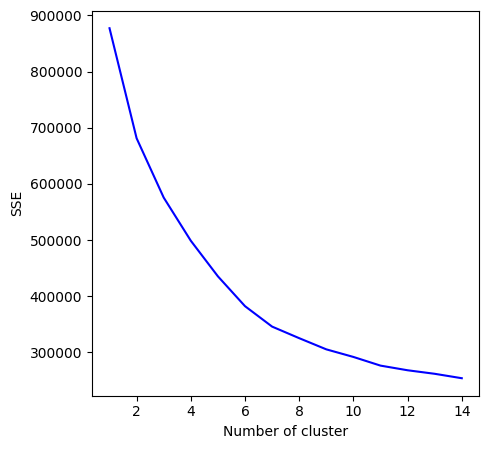

In [78]:
plt.figure(figsize=(5,5))
plt.plot(list(sse.keys()), list(sse.values()),'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Silhouette Analysis**

In [79]:
#3sil_avg = []
#for k in range(4,8):
#  kmeans = KMeans(init="k-means++",n_clusters=k,random_state=40).fit(X)
#  label = kmeans.labels_
#  sil_avg = silhouette_score(X, label)
#  print("For n_clusters = {}, silhouette score is {})".format(k, sil_avg))

In [80]:
kmeans_2 = KMeans(init="k-means++",n_clusters=2,random_state=40).fit(X)

In [81]:
silhouette_score(X, kmeans_2.labels_)

0.2502326930655286

In [82]:
kmeans_3 = KMeans(init="k-means++",n_clusters=3,random_state=40).fit(X)

In [83]:
silhouette_score(X, kmeans_3.labels_)

0.26277933277061516

In [84]:
kmeans_4 = KMeans(init="k-means++",n_clusters=4,random_state=40).fit(X)

In [85]:
silhouette_score(X, kmeans_4.labels_)

0.2141069997601636

In [86]:
kmeans_5 = KMeans(init="k-means++",n_clusters=5,random_state=40).fit(X)

In [87]:
silhouette_score(X, kmeans_5.labels_)

0.21575568789710003

In [88]:
#kmeans_6 = KMeans(init="k-means++",n_clusters=6,random_state=40).fit(X)

**INSIGHTS :**

By elbow method and silhouette_score, consider optimal k=2.

In [89]:
#silhouette_score(X, kmeans_6.labels_)

In [90]:
kmeans_2.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [91]:
X.head()

,orgyear,ctc_log,ctc_updated_year,YoE,company_hash_encode,job_position_encode
0,-0.595728,1.418448,-0.414291,0.492664,0.841054,1.507473
1,-0.365149,-1.356425,0.356485,0.492664,-0.494595,1.507473
2,-2.440362,0.848128,1.127260,2.900462,-0.486022,0.184695
3,-1.287466,1.410681,-1.185067,0.974223,-0.000799,0.183533
4,0.787747,-0.912522,0.356485,-0.711236,4.006148,-1.343632


In [92]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)

In [104]:
transformed = pd.DataFrame(transformed, columns=['F1', 'F2'])
transformed['label2'] = kmeans_2.labels_

<Axes: xlabel='F1', ylabel='F2'>

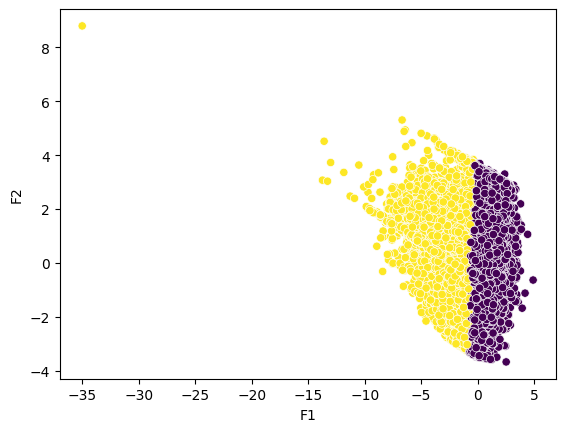

In [105]:
sns.scatterplot(x=transformed['F1'],y=transformed['F2'],c=transformed['label2'])

In [106]:
data['label']=kmeans_2.labels_

<ipython-input-106-e7ba0efe2e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=kmeans_2.labels_


In [107]:
data.head()

,orgyear,ctc_log,ctc_updated_year,YoE,company_hash_encode,job_position_encode,label
0,2012.0,21.707673,2019.0,7.0,0.010160,2431.717315,1
1,2013.0,17.931569,2020.0,7.0,0.000007,2431.717315,0
3,2004.0,20.931569,2021.0,17.0,0.000072,1319.056588,1
4,2009.0,21.697103,2018.0,9.0,0.003760,1318.079026,1
5,2018.0,18.535640,2020.0,2.0,0.034221,33.497781,0


In [95]:
scaled=transformed[['F1','F2']]

In [96]:
scaled.head()

,F1,F2
0,-0.802907,0.104957
1,0.071361,-0.144336
2,-3.520654,1.512352
3,-2.059533,-0.547510
4,1.876564,2.505819


### **Hierarchical Clustering : Agglomerative Method**

In [97]:
import scipy.cluster.hierarchy as sc

In [98]:
sample_df = scaled.sample(n=7000,random_state=7)

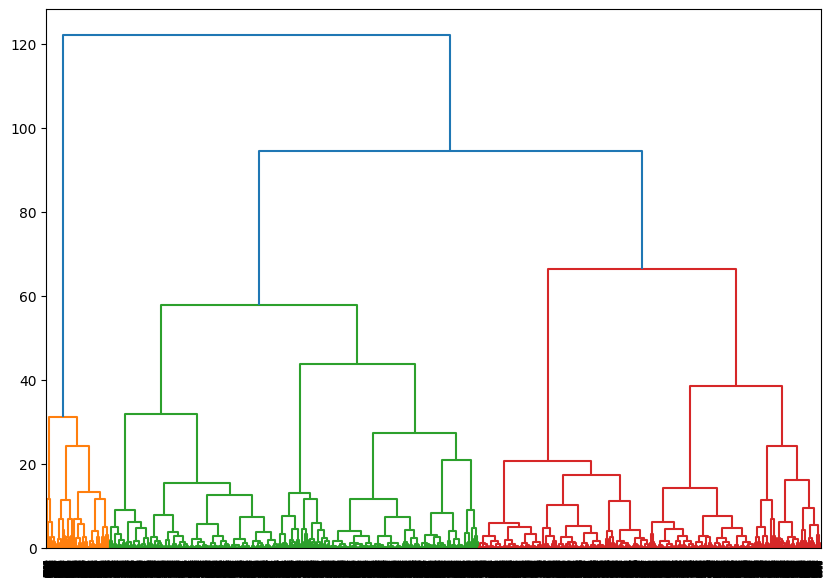

In [108]:
plt.figure(figsize=(10,7))
sc.dendrogram(sc.linkage(sample_df, method='ward'))
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(sample_df)

AgglomerativeClustering()

In [110]:
silhouette_score(sample_df, cluster.labels_)

0.5234336712065072

In [111]:
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit(sample_df)

AgglomerativeClustering(n_clusters=3)

In [112]:
silhouette_score(sample_df, cluster.labels_)

0.29824575684803584

In [113]:
cluster = AgglomerativeClustering(n_clusters=4,linkage='ward')
cluster.fit(sample_df)

AgglomerativeClustering(n_clusters=4)

In [114]:
silhouette_score(sample_df, cluster.labels_)

0.26516433003825457

In [115]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster.fit(sample_df)

AgglomerativeClustering(n_clusters=5)

In [116]:
silhouette_score(sample_df, cluster.labels_)

0.28522752548415947

### **INSIGHTS :**
1. From dendrogram and silhouette_score, we consider K=2 will give good result.

In [123]:
cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(sample_df)

AgglomerativeClustering()

In [124]:
cluster.labels_

array([0, 0, 0, ..., 1, 0, 0])

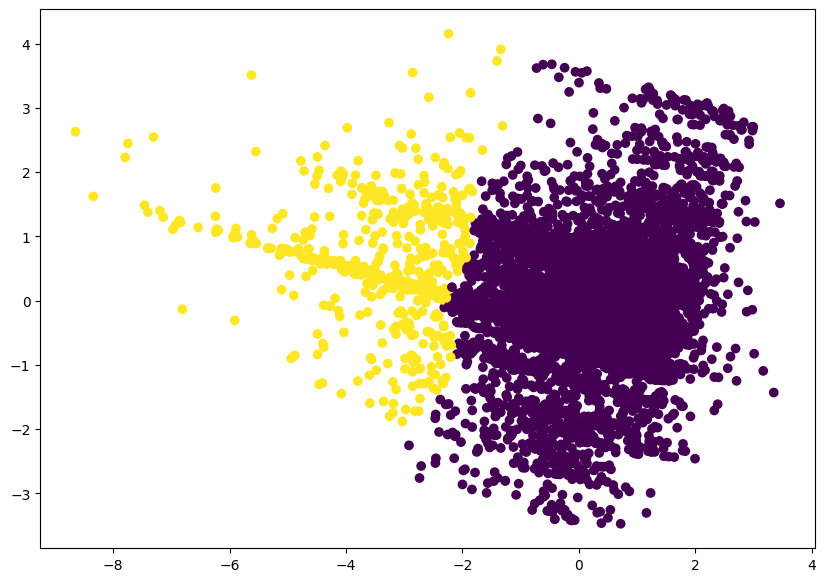

In [125]:
plt.figure(figsize=(10,7))
plt.scatter(sample_df['F1'],sample_df['F2'],c=cluster.labels_)

In [126]:
sample_df['label']=cluster.labels_

In [127]:
sample_df.head()

,F1,F2,label
117471,1.115405,0.149352,0
40587,-0.504915,-0.369307,0
139664,1.519339,0.401415,0
10934,1.470366,0.759627,0
102869,0.044838,0.040116,0


## **INSIGHTS :**
1.	"Backend Engineer" has highest number of Job and is followed by "Full Stack Engineer" and "Frontend Engineer"
2.	There is increase in employment from 2010 and was at peak between years 2015 to 2019. After 2019, there was decrease in employment in 2020 and 2021. This decline can be due to Covid-19 Pandemics.
3.	Similarly, CTC updation (Yearly increments, Promotions) was higher in 2019 and decreased after that.
4.	Mean salary of employees have reduced over the years despite rising inflation rate which is not good
5.	Among top 10 employees (earning more than most of the employees in the company) in Tier 1, they belong to 5 companies indicating that this companies pay high to their employees. Also their mean CTC is around 34.5 L
6.	Among top 10 employees of data science in each company earning more than their peers - Class 1, employees at position "Data Scientist" are at top and average CTC is 33L.
7.	Among bottom 10 employees from class 3 in data science in each company earning less than their peers are also from "Data Scientist" positions but different company as from Class 1 with average CTC falling to 15.19 Lacs
8.	Among top 2 positions in every company (based on their CTC), it mostly includes Data Engineers and related job positions.
9.	Among top 2 positions in every company (based on their CTC), it mostly includes Data Engineers and related job positions.
10.	Among top 2 positions in every company (based on their CTC), it mostly includes Data Engineers and related job positions.
11.	In K-means, by elbow method and silhouette score, we consider k = 2 (i.e clustering data into 2 groups.)
12.	In Hierarchical clustering, from dendrogram and silhouette score, we consider K=2 will give good result.

## **Recommendations :**
1.	Scaler should focus more on course of Backend Engineer, Full Stack Engineer and Frontend Engineer positions.
2.	In Tier 1 , they should have focus on “Nvnv Wgzohrnvzwj Otqcxwto” , “Ygbt Atugn”, “Fxuqg Rna Xzaxv”, “Hztburgjta” and “Rtdxoztdxo” as their average CTC is among highest .
3.	For good CTC, one should focus on Data Science.
4.	Scaler should not allow companies like “Wvcxoogz Ojontbo” , “Dtrxhb Ntwyzgrgsxto, “Wytnh Xzaxv Ucn Rna” as their CTC is low or can request to increase their CTC atleast.
5.	Scaler should focus more on companies having hash like “Mhkkxzx Lvwgmogz Uojwygrgsxono” , “Xbvzax Unt Rna” , “Xbvzax Unt Rna” as they have highest average CTC.
